# Fuzzy Logic example

#### Cristian David Estupiñán Ojeda

Example of Fuzzy logic applied to the control of **CO2** levels in a certain fluid from values of **KH** and **pH**.

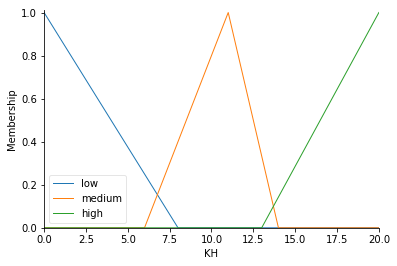

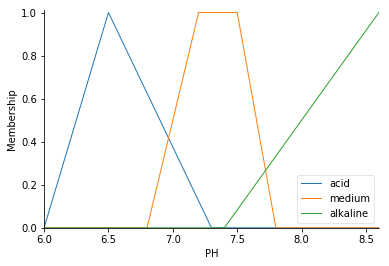

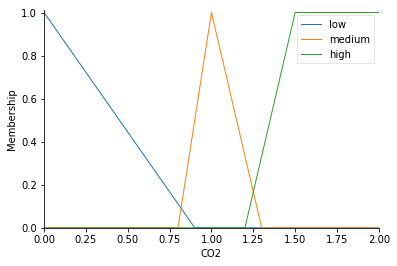

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

kh = ctrl.Antecedent(np.arange(0., 20.5, 0.5), 'KH')
ph = ctrl.Antecedent(np.arange(6., 8.7, 0.1), 'PH')
co2 = ctrl.Consequent(np.arange(0., 2.1, 0.1), 'CO2')

# Auto-membership function population is possible with .automf(3, 5, or 7)
kh['low'] = fuzz.trimf(kh.universe, [0., 0., 8.])
kh['medium'] = fuzz.trimf(kh.universe, [6., 11., 14.])
kh['high'] = fuzz.trimf(kh.universe, [13., 20., 20.])

ph['acid'] = fuzz.trimf(ph.universe, [6., 6.5, 7.3])
ph['medium'] = fuzz.trapmf(ph.universe, [6.8, 7.2, 7.5,7.8])
ph['alkaline'] = fuzz.trimf(ph.universe, [7.4, 8.6, 8.6])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
co2['low'] = fuzz.trimf(co2.universe, [0., 0., 0.9])
co2['medium'] = fuzz.trimf(co2.universe, [0.8, 1., 1.3])
co2['high'] = fuzz.trapmf(co2.universe, [1.2, 1.5, 2., 2.])

kh.view()
ph.view()
co2.view()

1.035


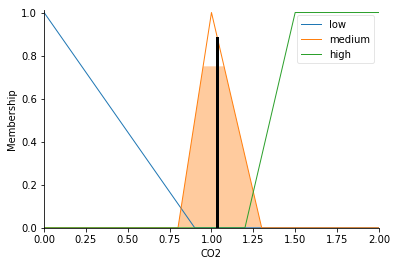

In [2]:
#Control rules

rule1 = ctrl.Rule(kh['low'] & (ph['acid']), co2['low'])
rule2 = ctrl.Rule(ph['alkaline'], co2['high'])
rule3 = ctrl.Rule(ph['medium'] & (kh['medium']), co2['medium'])
rule4 = ctrl.Rule(ph['medium'] & (kh['high']), co2['medium'])


co2_flow = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
co2_flow_sim = ctrl.ControlSystemSimulation(co2_flow)

co2_flow_sim.input['KH']=11.1
co2_flow_sim.input['PH']=7.1

# Crunch the numbers
co2_flow_sim.compute()

print(co2_flow_sim.output['CO2'])
co2.view(sim=co2_flow_sim)

0.37445610687022907


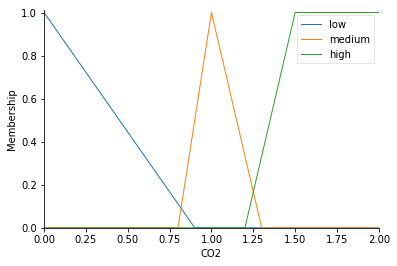

In [7]:
co2_flow_sim.input['KH']=5.1
co2_flow_sim.input['PH']=6.7

# Crunch the numbers
co2_flow_sim.compute()

print(co2_flow_sim.output['CO2'])
co2.view(sim=co2_flow_sim)

1.6476190476190475


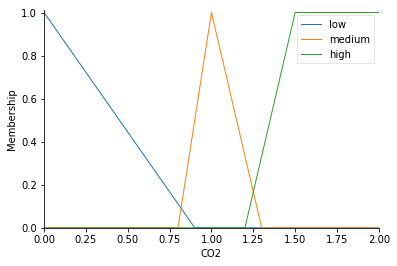

In [8]:
co2_flow_sim.input['KH']=2.1
co2_flow_sim.input['PH']=8.2

# Crunch the numbers
co2_flow_sim.compute()

print(co2_flow_sim.output['CO2'])
co2.view(sim=co2_flow_sim)